# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [56]:
# Combine the data into a single dataset
# Display the data table for preview
raw_Pharmac = pd.merge(study_results,mouse_metadata, on="Mouse ID")
raw_Pharmac.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
mice_number = len(raw_Pharmac["Mouse ID"].unique())
mice_number

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = raw_Pharmac[raw_Pharmac.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_array = raw_Pharmac.loc[(raw_Pharmac["Mouse ID"]== "g989"), :] 
duplicates_array

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pharmac_data = raw_Pharmac.loc[raw_Pharmac["Mouse ID"]!= "g989",:]

In [12]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = len(Pharmac_data["Mouse ID"].unique())
mice_number2

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Pharmac_group = Pharmac_data.groupby(["Drug Regimen"])

Tumor_volume_mean = Pharmac_group["Tumor Volume (mm3)"].mean()
Tumor_volume_median = Pharmac_group["Tumor Volume (mm3)"].median()
Tumor_volume_variance = Pharmac_group["Tumor Volume (mm3)"].var()
Tumor_volume_std = Pharmac_group["Tumor Volume (mm3)"].std()
Tumor_volume_sem = Pharmac_group["Tumor Volume (mm3)"].sem()

In [13]:
# Assemble the resulting series into a single summary DataFrame.
Tumor_volume_df = pd.DataFrame({"Mean Tumor Volume":Tumor_volume_mean, "Median Tumor Volume":Tumor_volume_median,
                                   "Tumor Volume Variance":Tumor_volume_variance,"Tumor Volume Std. Dev.":Tumor_volume_std,
                                "Tumor Volume Std. Err.":Tumor_volume_sem })
Tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
summary_stats = Pharmac_group["Tumor Volume (mm3)"].agg([ 'mean', 'median', 'var', 'std', 'sum'])
summary_stats

,mean,median,var,std,sum
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,9355.420462
Ceftamin,52.591172,51.776157,39.290177,6.268188,9361.228582
Infubinol,52.884795,51.820584,43.128684,6.567243,9413.493529
Ketapril,55.235638,53.698743,68.553577,8.279709,10384.299876
Naftisol,54.331565,52.509285,66.173479,8.134708,10105.671026
Placebo,54.033581,52.288934,61.168083,7.821003,9780.078122
Propriva,52.320930,50.446266,43.852013,6.622085,7743.497619
Ramicane,40.216745,40.673236,23.486704,4.846308,9169.417875
Stelasyn,54.233149,52.431737,59.450562,7.710419,9816.199991


## Bar and Pie Charts

In [48]:
# Get the narrowed dataframe
mice_count = Pharmac_group["Timepoint"].count()
count_by_type_df = pd.DataFrame({ "number of mice":mice_count})
count_by_type_df

,number of mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


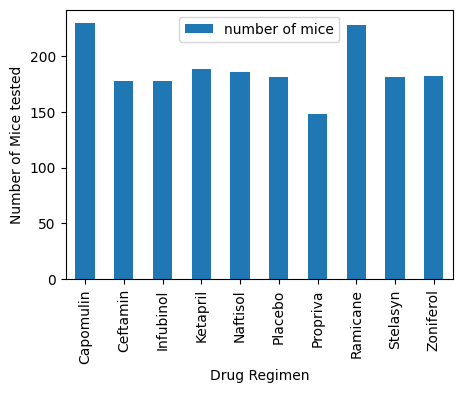

<Figure size 640x480 with 0 Axes>

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_by_type_df.plot(kind="bar", figsize=(5,3.5))

# Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


In [53]:
# Set x axis and tick locations
x_axis = np.arange(len(count_by_type_df))
tick_locations = [value for value in x_axis]

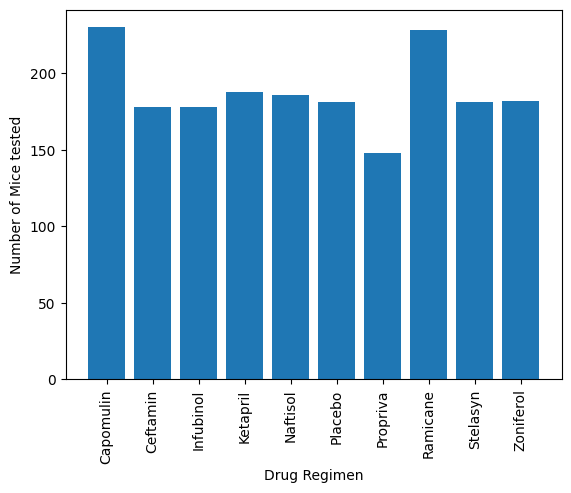

In [54]:
plt.bar(x_axis, count_by_type_df["number of mice"])
plt.xticks(tick_locations, count_by_type_df.index, rotation="vertical")

# Give our chart some labels and a tile
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")

plt.show()

In [65]:
# Get the narrowed dataframe
Pharmac_group2 = Pharmac_data.groupby(["Sex"])
mice_count2 = Pharmac_group2["Timepoint"].count()
count_by_sex_df = pd.DataFrame({ "number of mice":mice_count2})
count_by_sex_df

,number of mice
Sex,
Female,922
Male,958


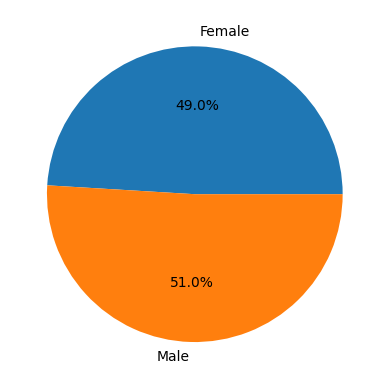

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas 

pie_plot=count_by_sex_df.plot.pie(y="number of mice",autopct='%1.1f%%', legend=False)

# Set labels
pie_plot.set_ylabel('')
plt.show()

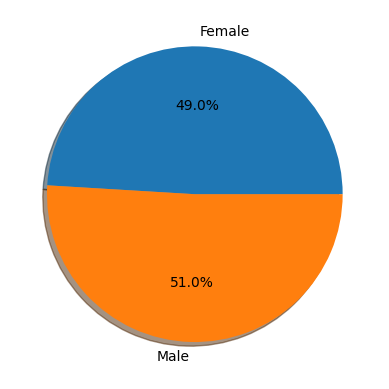

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = count_by_sex_df.index
sizes = count_by_sex_df["number of mice"]

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Pharmac_group3 = Pharmac_data.groupby(["Drug Regimen","Mouse ID"])
last_timepoint = Pharmac_group3["Timepoint"].max()
last_timepoint_df = pd.DataFrame({"Timepoint":last_timepoint})
last_timepoint_df

Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45
...                          ...
Zoniferol    q633             45
             s337             45
             w140              5
             w575             45
             x613             15

[248 rows x 1 columns]

In [41]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(Pharmac_data, last_timepoint_df, on=["Drug Regimen","Mouse ID","Timepoint"], how="inner")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create list to fill with tumor vol data (for plotting)
Capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :"Tumor Volume (mm3)"]["Tumor Volume (mm3)"]
Ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :"Tumor Volume (mm3)"]
Infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :"Tumor Volume (mm3)"]
Cegtamin = merge_df.loc[merge_df["Drug Regimen"] == "Cegtamin", :"Tumor Volume (mm3)"]
Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


0      38.982878
224    38.753265
225    32.377357
226    23.343598
227    38.939633
228    28.484033
229    41.483008
230    40.728578
231    46.539206
232    31.023923
233    38.125164
234    40.658124
235    36.041047
236    37.311846
237    41.581521
238    31.896238
239    40.159220
240    37.074024
241    38.846876
242    39.952347
243    34.455298
244    47.685963
245    33.329098
246    30.485985
247    28.430964
Name: Tumor Volume (mm3), dtype: float64

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

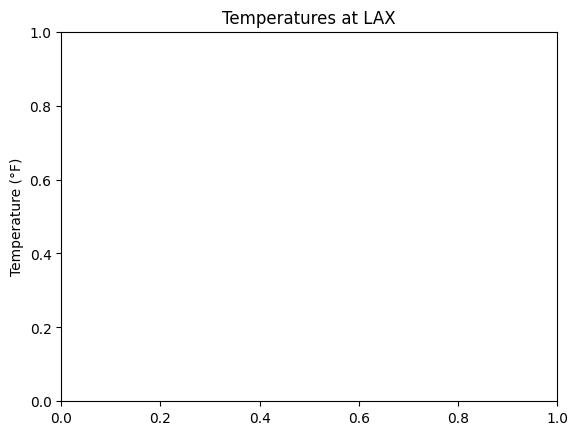

In [90]:
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(Capomulin)
plt.show()

In [92]:
def getIQR(drug):
    Q1 = drug["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = drug["Tumor Volume (mm3)"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(IQR)
    
for Treat in Drug_Regimens:
    getIQR(Treat)

TypeError: string indices must be integers

In [ ]:
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

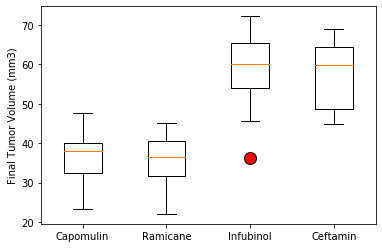

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

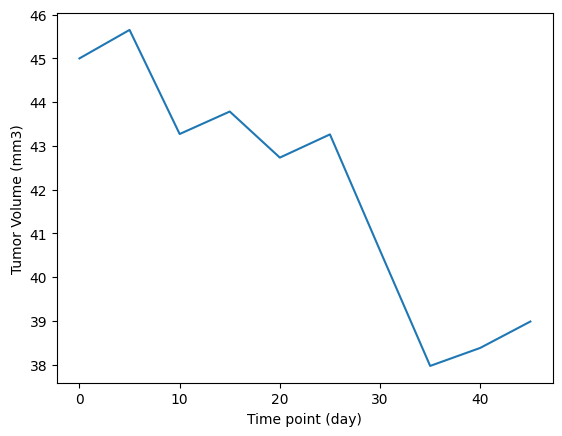

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128_data = Pharmac_data.loc[Pharmac_data["Mouse ID"] == "b128", :"Tumor Volume (mm3)"]

plt.plot(b128_data["Timepoint"],b128_data["Tumor Volume (mm3)"])
plt.xlabel("Time point (day)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [73]:
# get the data
average_tumer_volume = Pharmac_group3["Tumor Volume (mm3)"].mean()
average_weight = Pharmac_group3["Weight (g)"].mean()
volume_weight_df = pd.DataFrame({"tumer volume":average_tumer_volume, "weight":average_weight})
volume_weight_df = volume_weight_df.reset_index().rename(columns={'level_0': 'Drug Regimen', 'level_1': 'Mouse ID'})
capomulin_weight_df = volume_weight_df.loc[volume_weight_df["Drug Regimen"]=="Capomulin"]


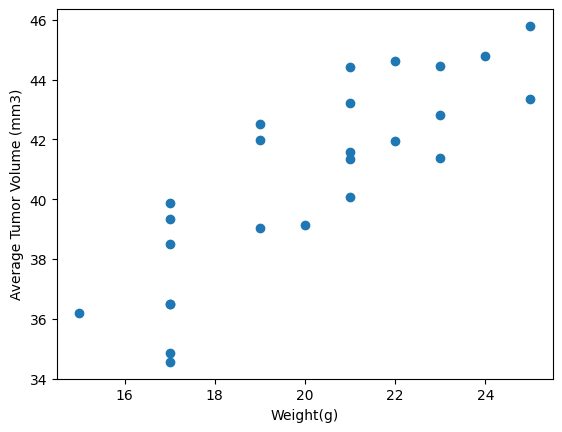

In [76]:
plt.scatter(capomulin_weight_df["weight"], capomulin_weight_df["tumer volume"], marker="o")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

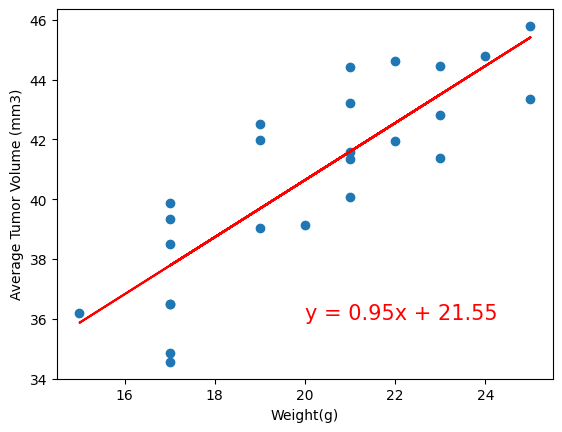

The correlation between both factors is 0.84


In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_weight_df["weight"]
y_values = capomulin_weight_df["tumer volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")